In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.options.display.max_columns=None
# plt.rcParams.update({'font.size': 22})

In [3]:
df_todo = pd.read_csv('../datos/datos_divididos_unos.csv', index_col = 0)

In [4]:
df = df_todo[(df_todo ["job_title"] == "Business Analyst") | (df_todo["job_title"] == "Data Analyst")]

In [14]:
df_dev_languages = df.loc[:, 'dev_language_C++' : 'dev_language_Swift'].sum().reset_index()
df_dev_languages

,index,0
0,dev_language_C++,288.0
1,dev_language_Java,505.0
2,dev_language_MATLAB,230.0
3,dev_language_None,59.0
4,dev_language_C,388.0
5,dev_language_SQL,1866.0
6,dev_language_Bash,131.0
7,dev_language_R,928.0
8,dev_language_Javascript,327.0
9,dev_language_Python,2465.0


In [15]:
df_dev_languages.columns = ['dev_language', 'number_of_users']

df_dev_languages

,dev_language,number_of_users
0,dev_language_C++,288.0
1,dev_language_Java,505.0
2,dev_language_MATLAB,230.0
3,dev_language_None,59.0
4,dev_language_C,388.0
5,dev_language_SQL,1866.0
6,dev_language_Bash,131.0
7,dev_language_R,928.0
8,dev_language_Javascript,327.0
9,dev_language_Python,2465.0


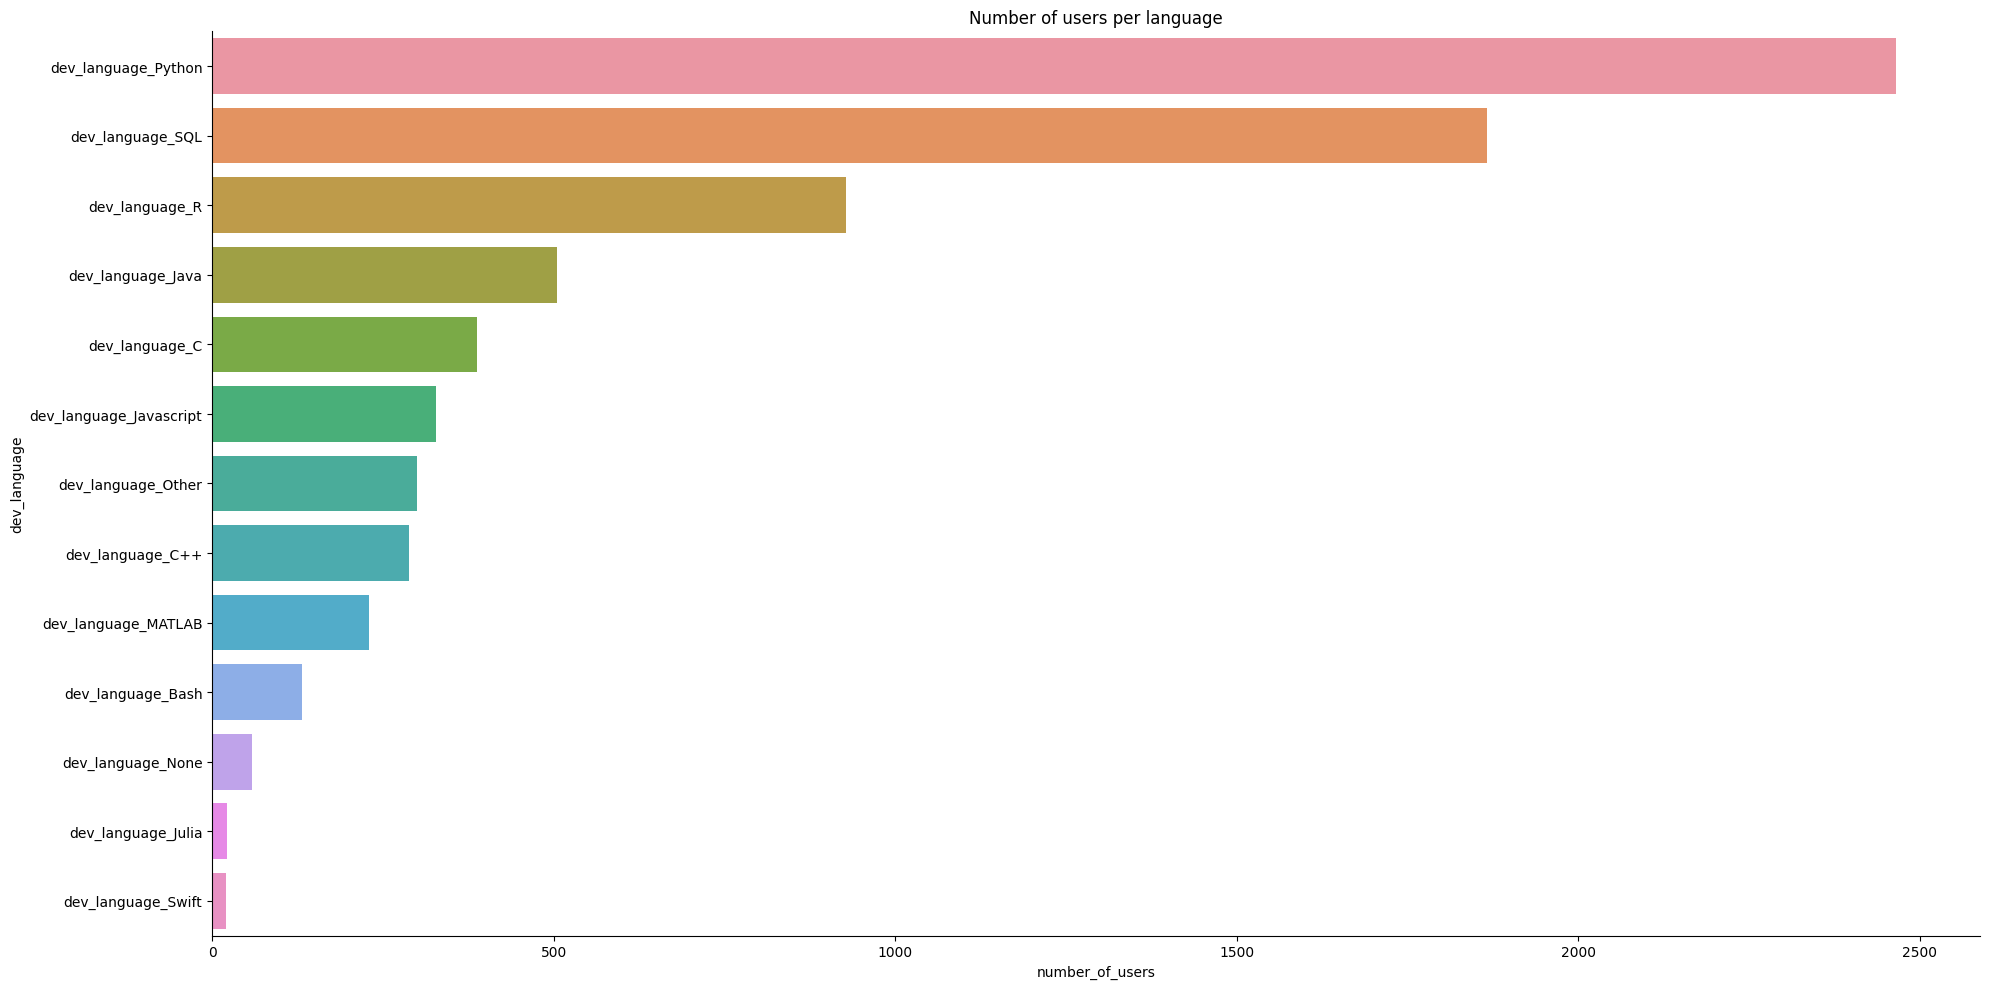

In [16]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='dev_language', x= 'number_of_users', data=df_dev_languages, order= df_dev_languages.sort_values('number_of_users', ascending= False)['dev_language'])

fig.set_title('Number of users per language') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [21]:
lista_prefijos = ['IDE', 'visualisation', 'big_data', 'BI_tools', 'activities', 'dev_language',  'notebooks', 'sharing']

In [13]:
df.drop(columns = ['IDE', 'visualisation', 'big_data', 'BI_tools', 'work_activities', 'dev_language'], inplace=True)

/tmp/ipykernel_3939/2129907744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['IDE', 'visualisation', 'big_data', 'BI_tools', 'work_activities', 'dev_language'], inplace=True)


In [91]:
def creacion_subplots(df, lista_prefijos):
    
    diccionario =  {}
    for i in lista_prefijos:
        lista_col = []
        for col in df.columns:
            if i in col:
                lista_col.append(col)

        dataframe_tool = df.loc[:, lista_col[0]: lista_col[-1]].sum(numeric_only=True).reset_index()
        dataframe_tool.columns = [f"{i}", 'number_of_users']
        diccionario[i] = dataframe_tool
    
       
    fig, axes = plt.subplots(4, 2, figsize=(20, 15))
    axes = axes.flatten()
    for n, (key, dataframe) in enumerate(diccionario.items()):
            fig = sns.barplot(y=key, x= 'number_of_users', data=dataframe, order= dataframe.sort_values('number_of_users', ascending= False)[key], ax=axes[n])

            fig.set_title(f'Number of users per {key}') 

            fig.spines[["top", "right"]].set_visible(False)

            fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500])

    plt.tight_layout()

    plt.show()

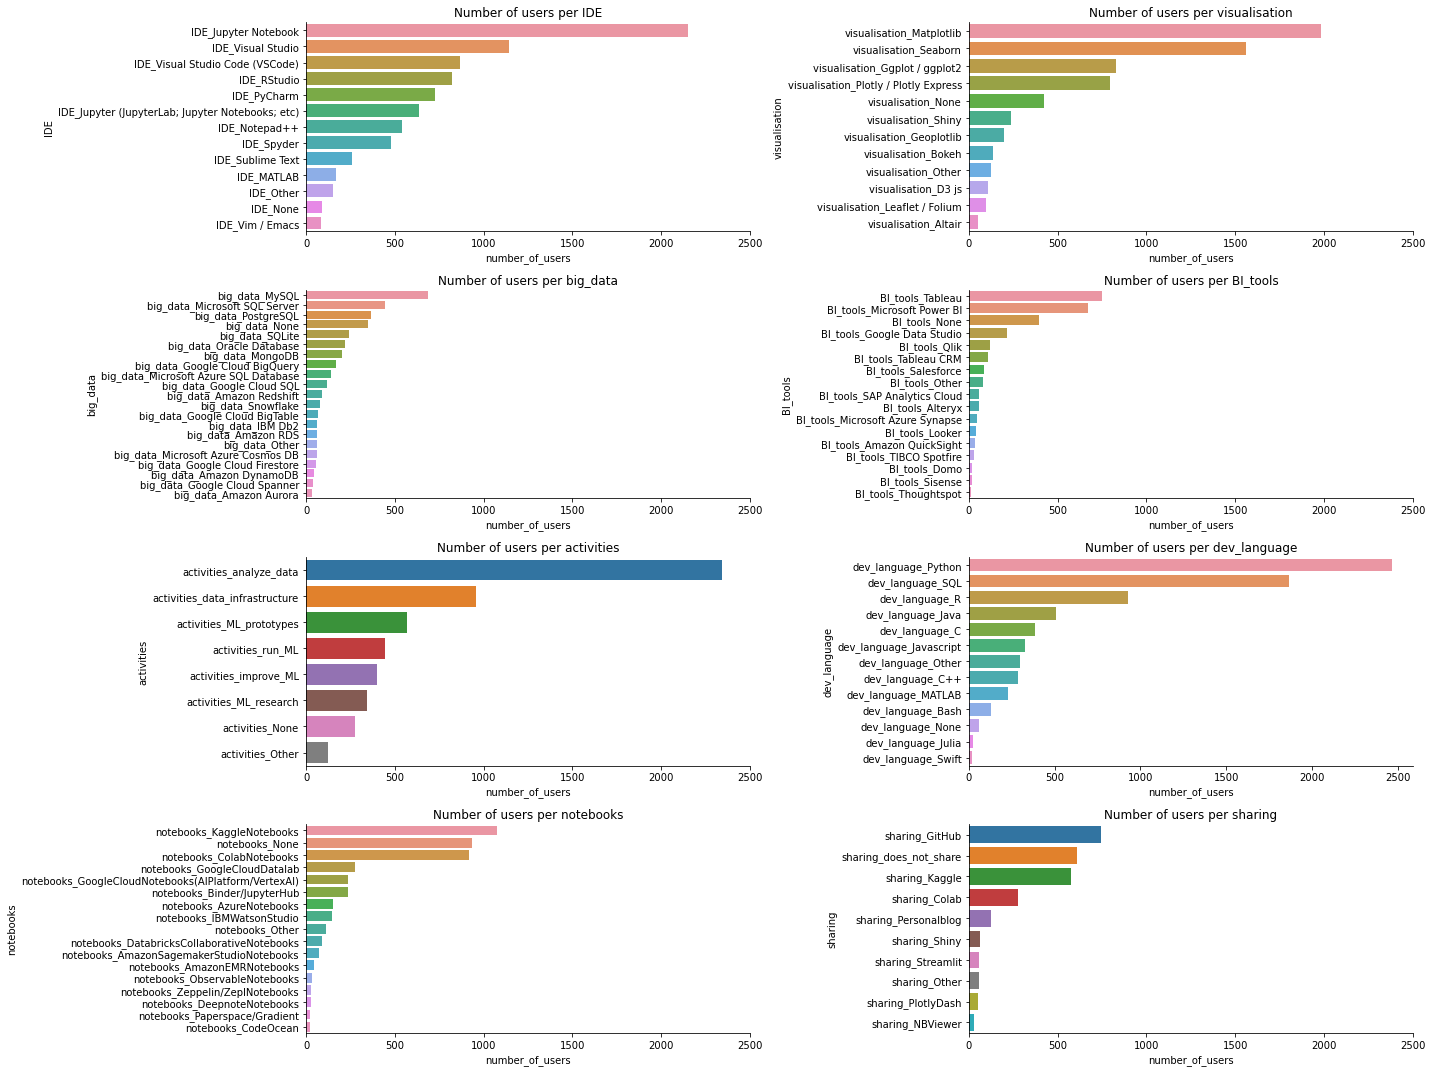

In [92]:
creacion_subplots(df, lista_prefijos)

In [20]:
def creacion_graficas(df, lista_prefijos):
    
    diccionario =  {}
    for i in lista_prefijos:zz
        lista_col = []
        for col in df.columns:
            if i in col:
                lista_col.append(col)

        dataframe = df.loc[:, lista_col[0]: lista_col[-1]].sum(numeric_only=True).reset_index()
        dataframe.columns = [f"{i}", 'number_of_users']
        diccionario[i] = dataframe
        
        plt.figure(figsize=(20, 10))

        fig=sns.barplot(y=i, x= 'number_of_users', data=diccionario[i], order= diccionario[i].sort_values('number_of_users', ascending= False)[i])

        fig.set_title(f'Number of users per {i} tool') 

        fig.spines[["top", "right"]].set_visible(False)

        fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500])

        plt.tight_layout()

        plt.show()
        
        #revisar el df_divididos_unos!!!
    
    

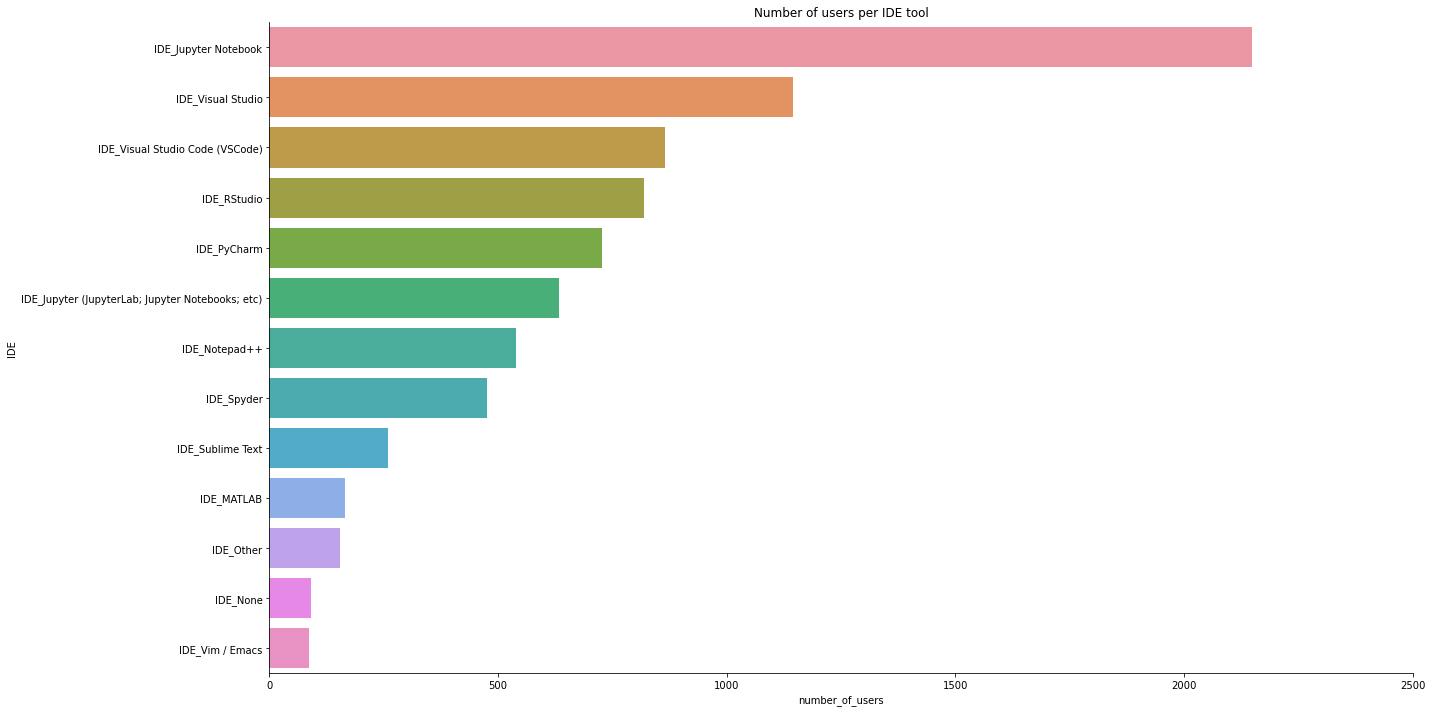

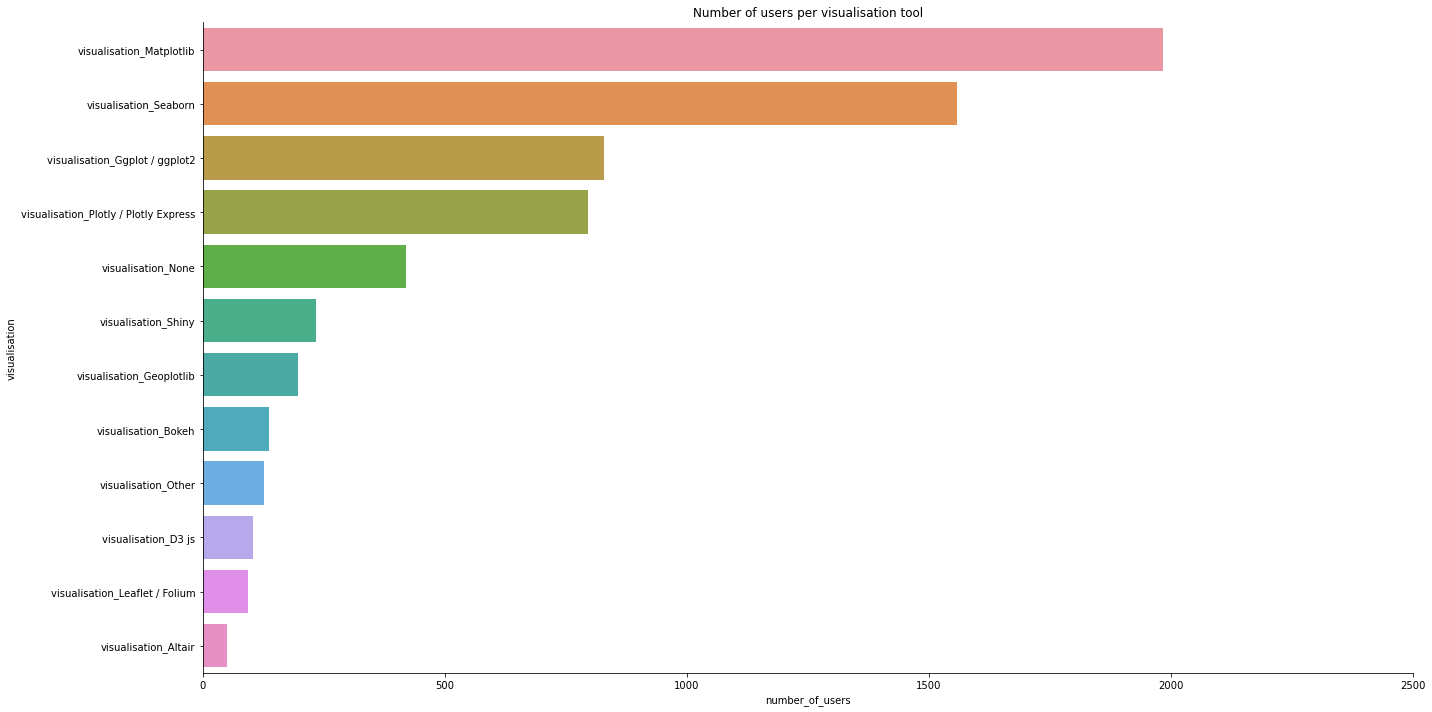

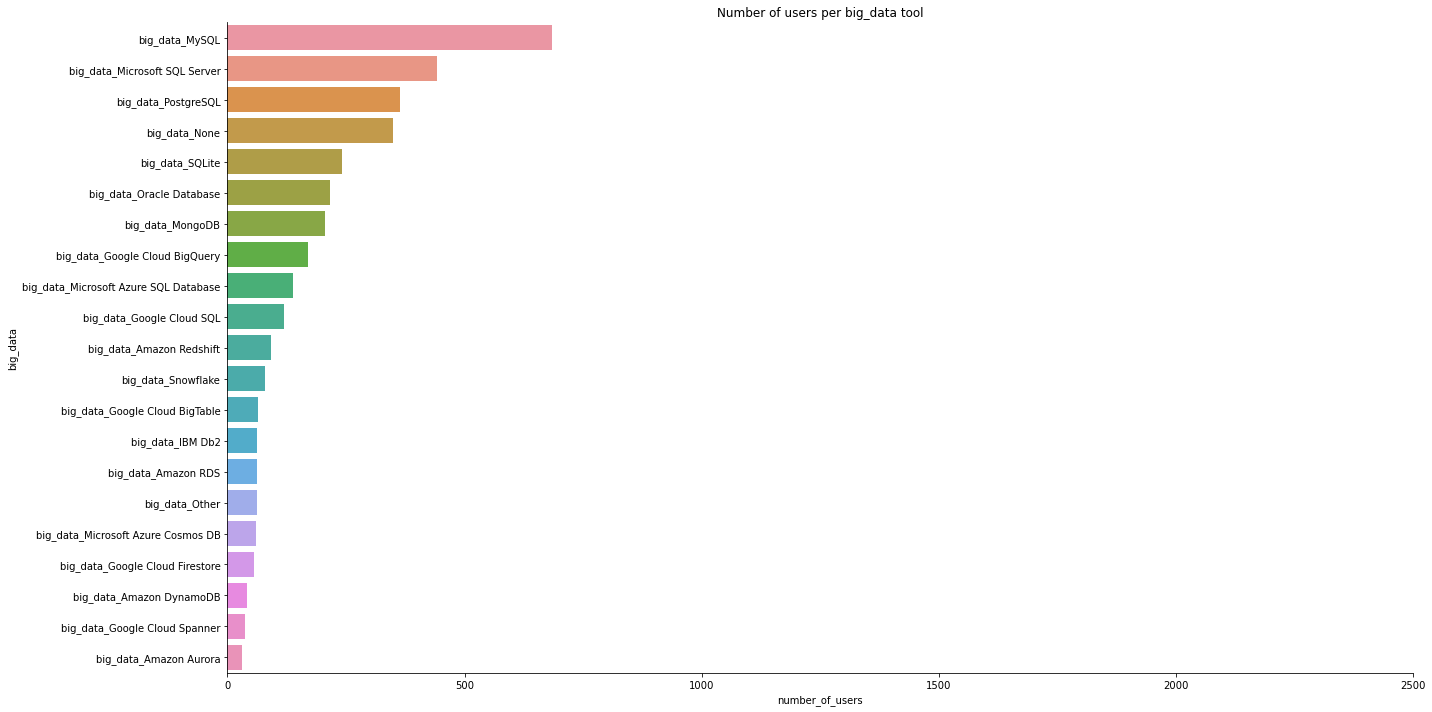

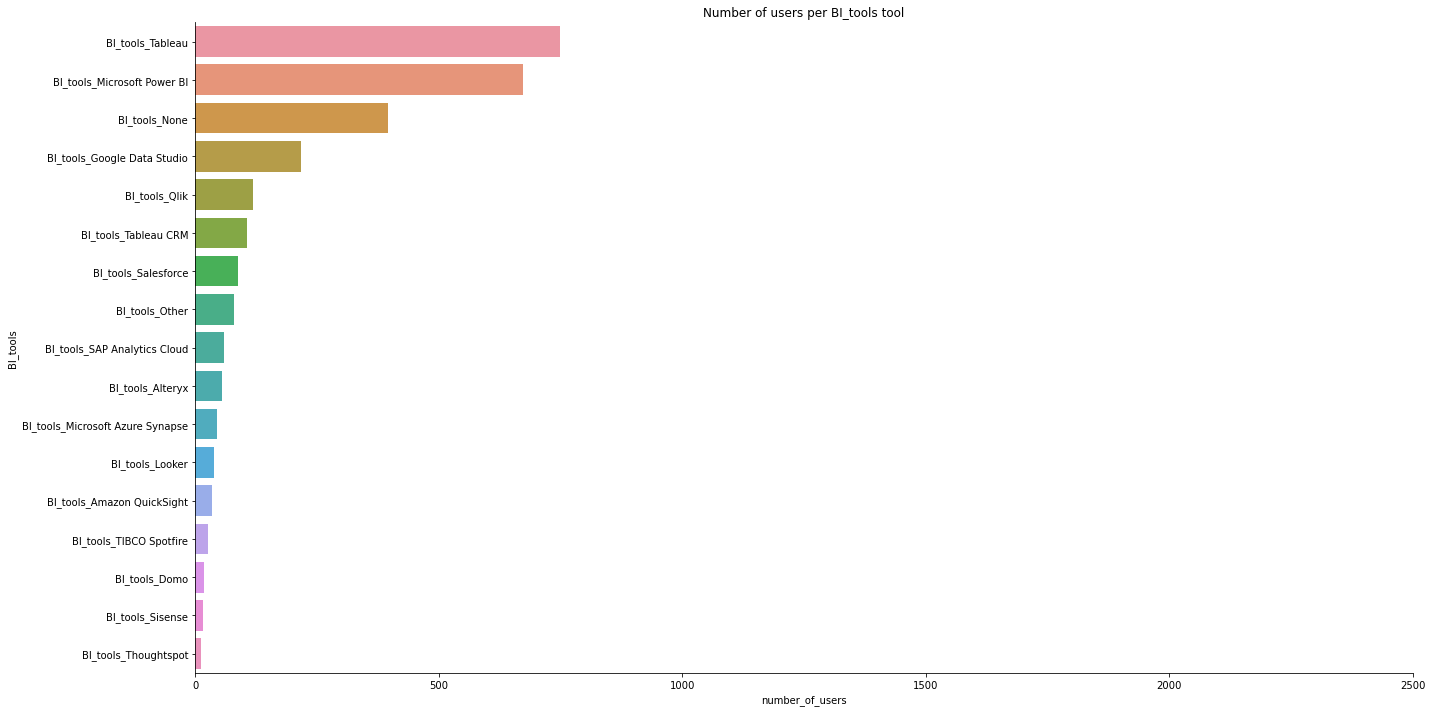

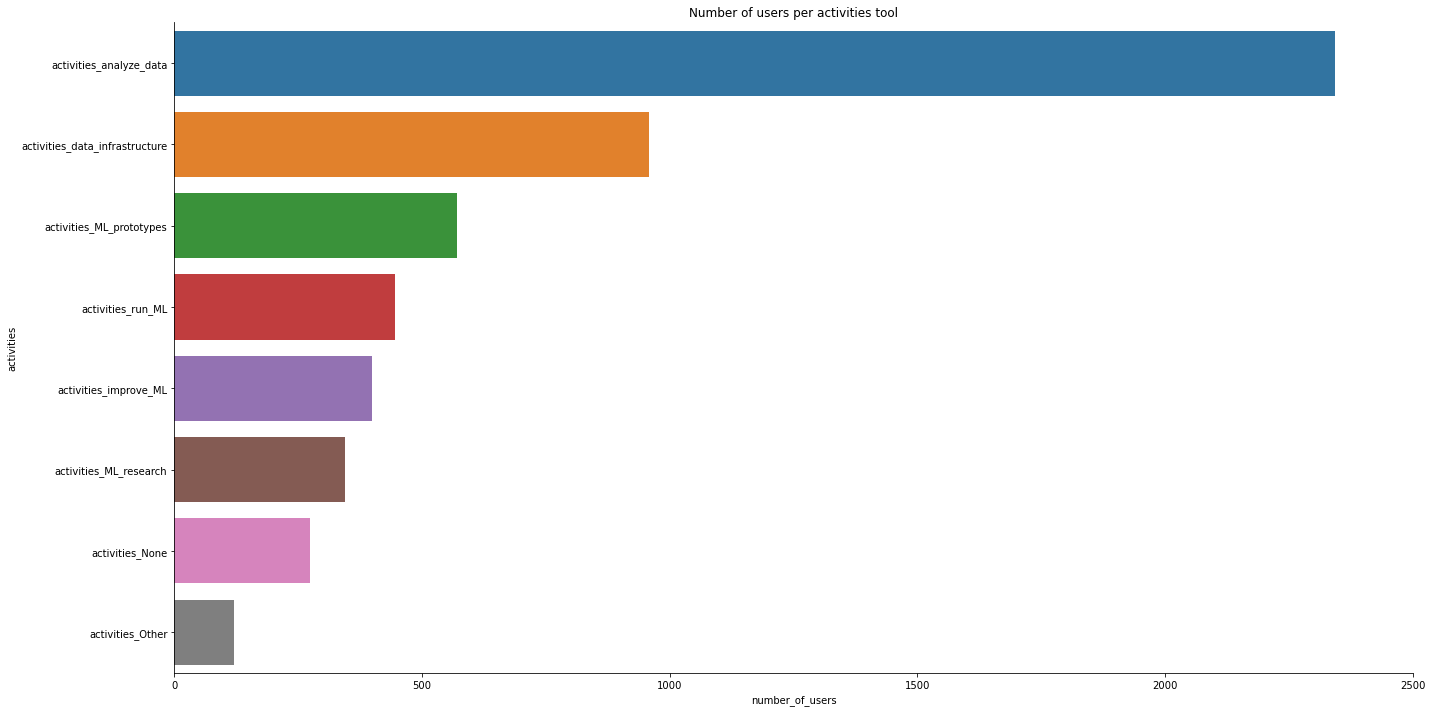

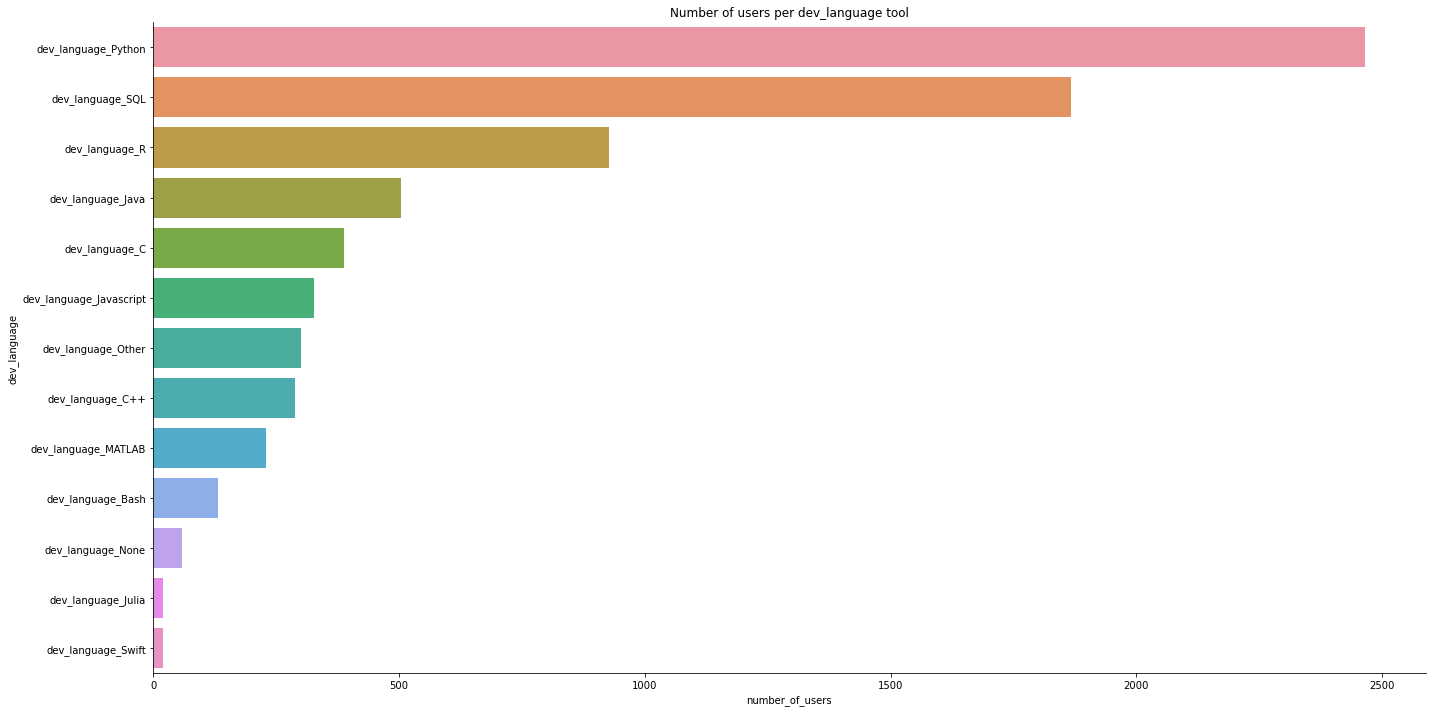

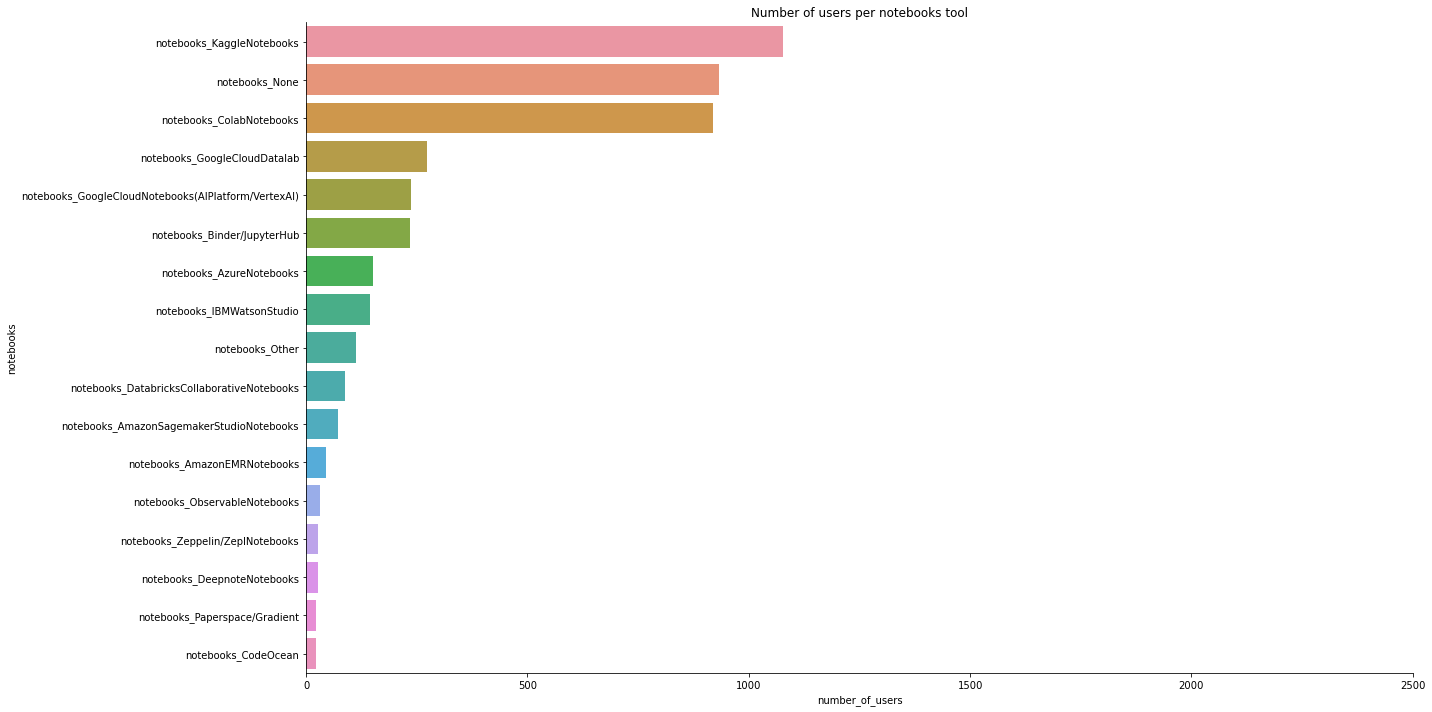

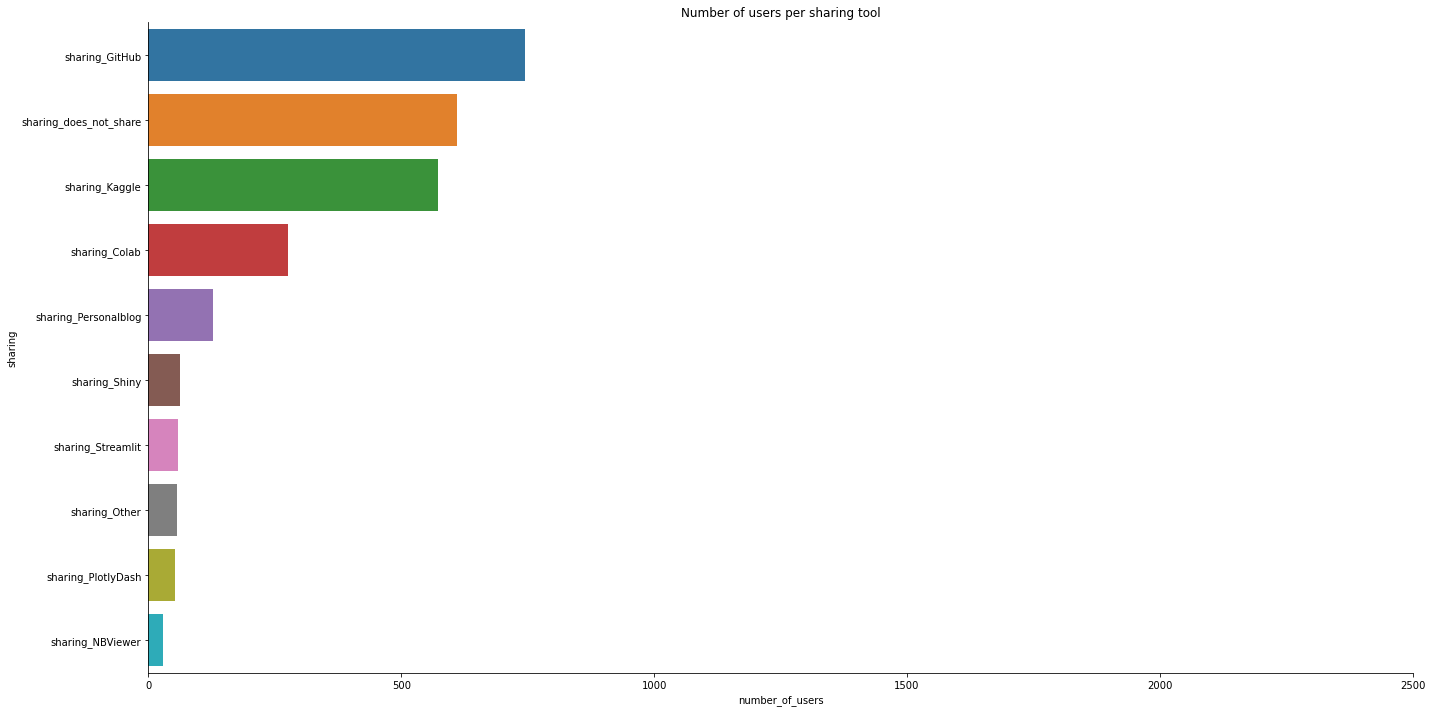

In [22]:
creacion_graficas(df, lista_prefijos)

In [21]:
df_visualisation = df.loc[:, 'visualisation_Matplotlib' : 'visualisation_Other'].sum().reset_index()
df_visualisation.columns = ['visualisation_software', 'number_of_users']
df_visualisation

,index,0
0,visualisation_Matplotlib,1984.0
1,visualisation_Shiny,235.0
2,visualisation_None,420.0
3,visualisation_Seaborn,1559.0
4,visualisation_Bokeh,138.0
5,visualisation_Leaflet / Folium,94.0
6,visualisation_Altair,50.0
7,visualisation_D3 js,105.0
8,visualisation_Plotly / Plotly Express,796.0
9,visualisation_Ggplot / ggplot2,830.0


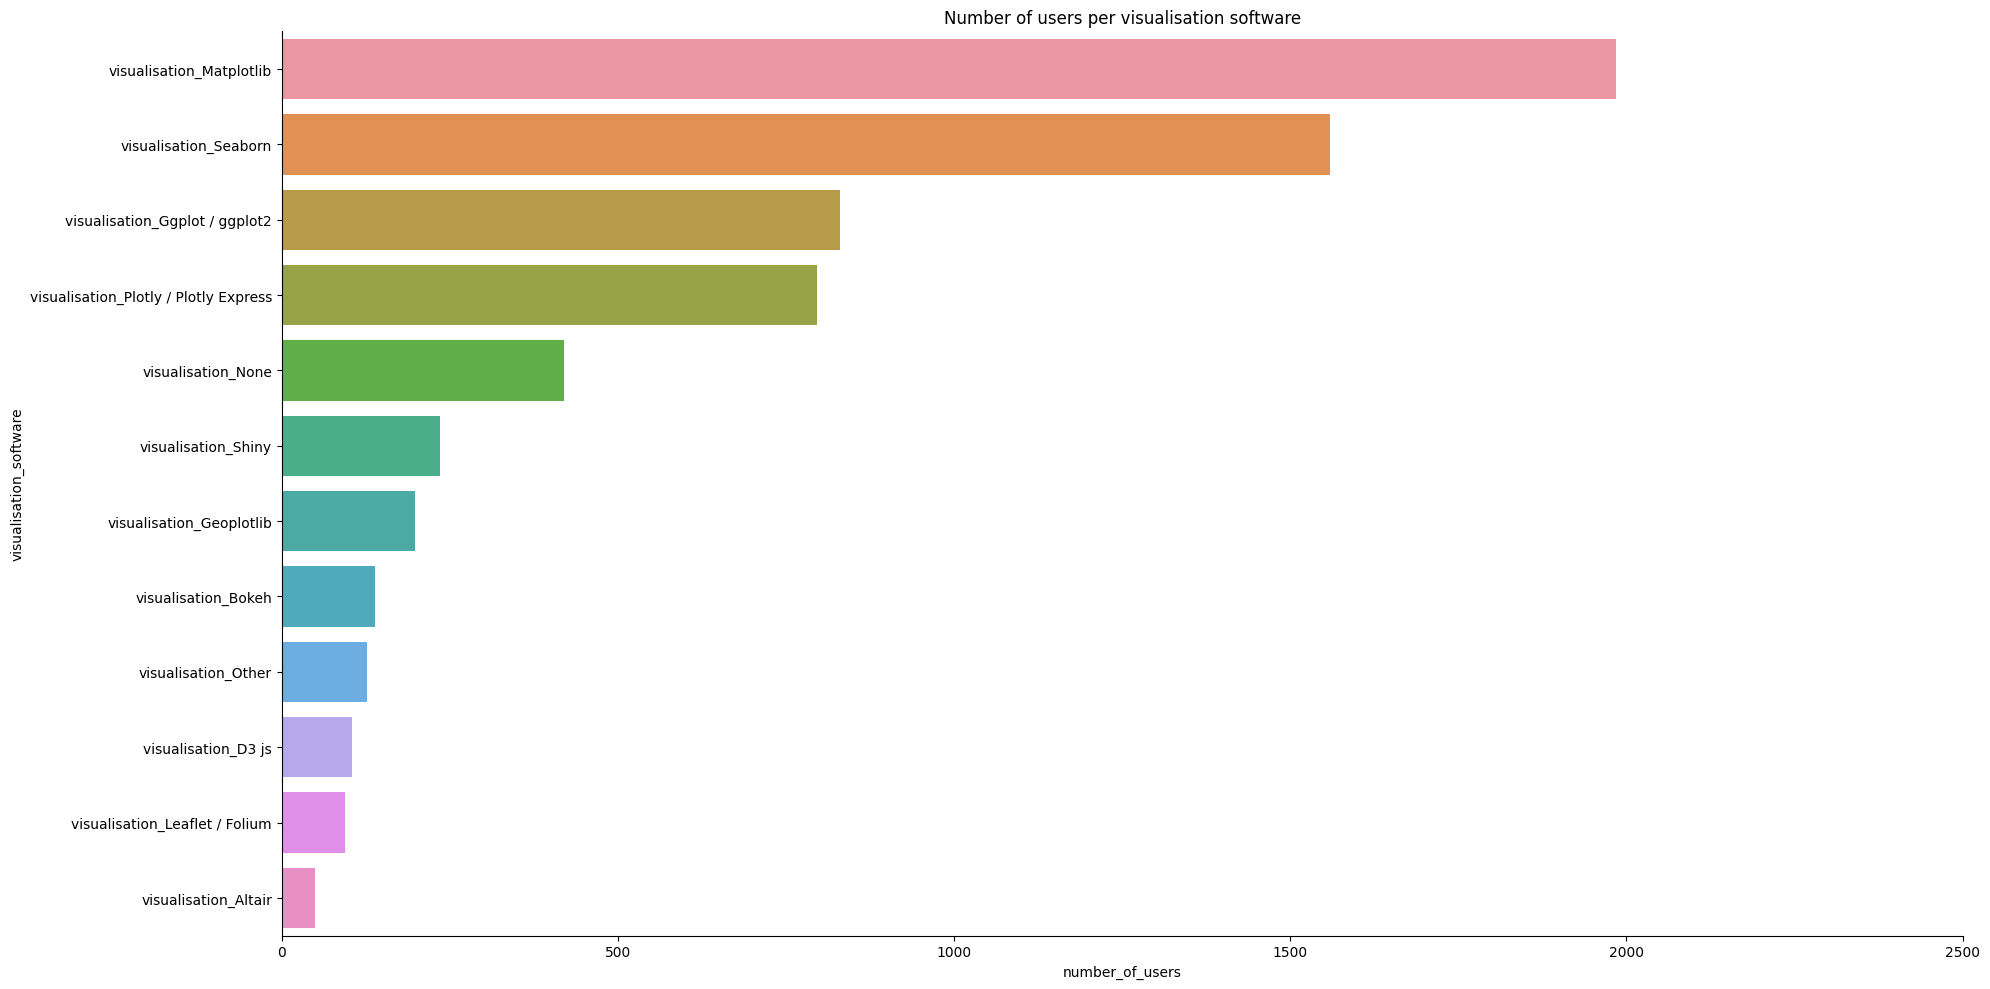

In [23]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='visualisation_software', x= 'number_of_users', 
                data=df_visualisation, 
                order= df_visualisation.sort_values('number_of_users', 
                ascending= False)['visualisation_software'])

fig.set_title('Number of users per visualisation software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

# sns.set(font_scale=2)

plt.tight_layout()

plt.show()

In [24]:
df_notebooks = df.loc[:, 'notebooks_KaggleNotebooks' : 'notebooks_Other'].sum().reset_index()
df_notebooks

/tmp/ipykernel_47080/2409738789.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_notebooks = df.loc[:, 'notebooks_KaggleNotebooks' : 'notebooks_Other'].sum().reset_index()


,index,0


In [26]:
df_ide = df.loc[:, 'IDE_Jupyter Notebook' : 'IDE_Other'].sum().reset_index()
df_ide.columns = ['IDE_software', 'number_of_users']
df_ide

,index,0
0,IDE_Jupyter Notebook,2149.0
1,IDE_Sublime Text,259.0
2,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),634.0
3,IDE_Spyder,476.0
4,IDE_None,90.0
5,IDE_Notepad++,539.0
6,IDE_RStudio,820.0
7,IDE_Visual Studio,1144.0
8,IDE_Visual Studio Code (VSCode),865.0
9,IDE_Vim / Emacs,86.0


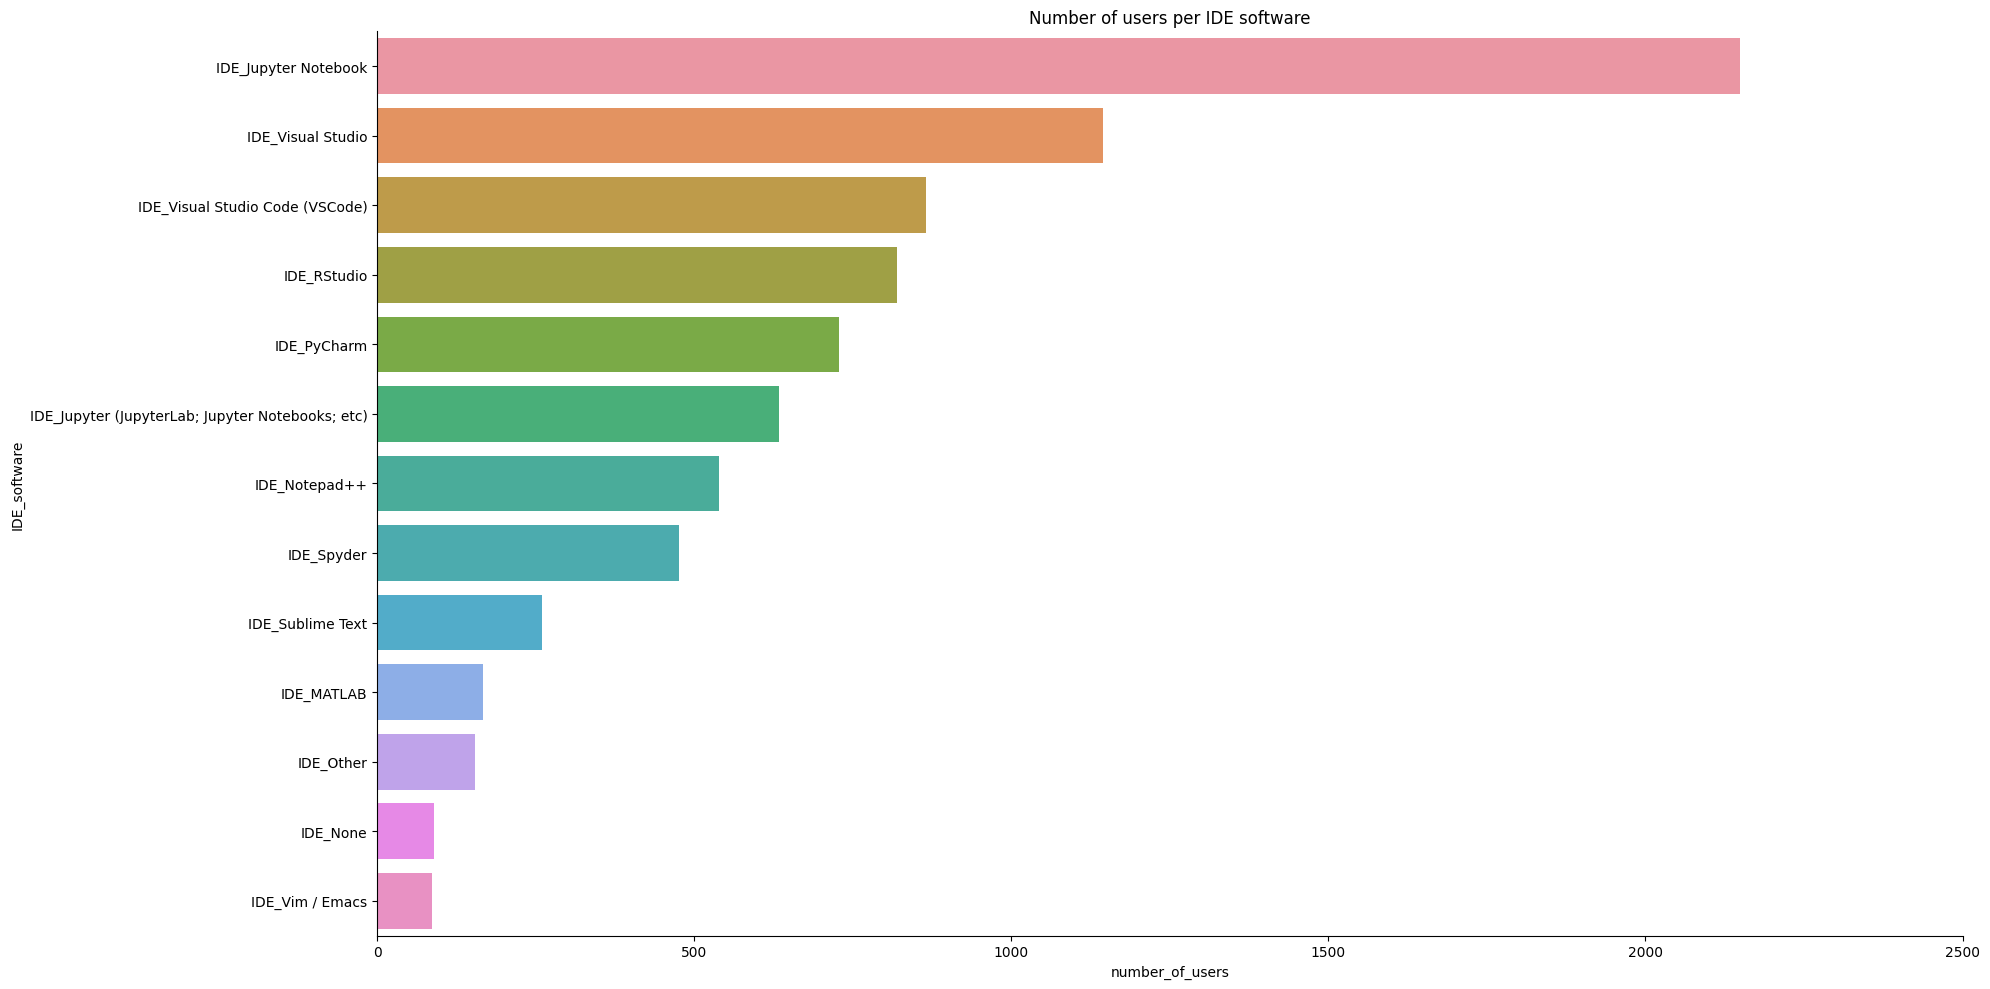

In [28]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='IDE_software', x= 'number_of_users', data=df_ide, order= df_ide.sort_values('number_of_users', ascending= False)['IDE_software'])

fig.set_title('Number of users per IDE software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [29]:
df_big_data = df.loc[:, 'big_data_Snowflake' : 'big_data_Amazon Aurora'].sum().reset_index()
df_big_data.columns = ['BigData_software', 'number_of_users']
df_big_data

,index,0
0,big_data_Snowflake,79.0
1,big_data_Oracle Database,217.0
2,big_data_MySQL,685.0
3,big_data_Google Cloud BigQuery,169.0
4,big_data_Microsoft SQL Server,442.0
5,big_data_None,349.0
6,big_data_Google Cloud BigTable,65.0
7,big_data_Amazon RDS,62.0
8,big_data_Microsoft Azure Cosmos DB,60.0
9,big_data_Google Cloud SQL,120.0


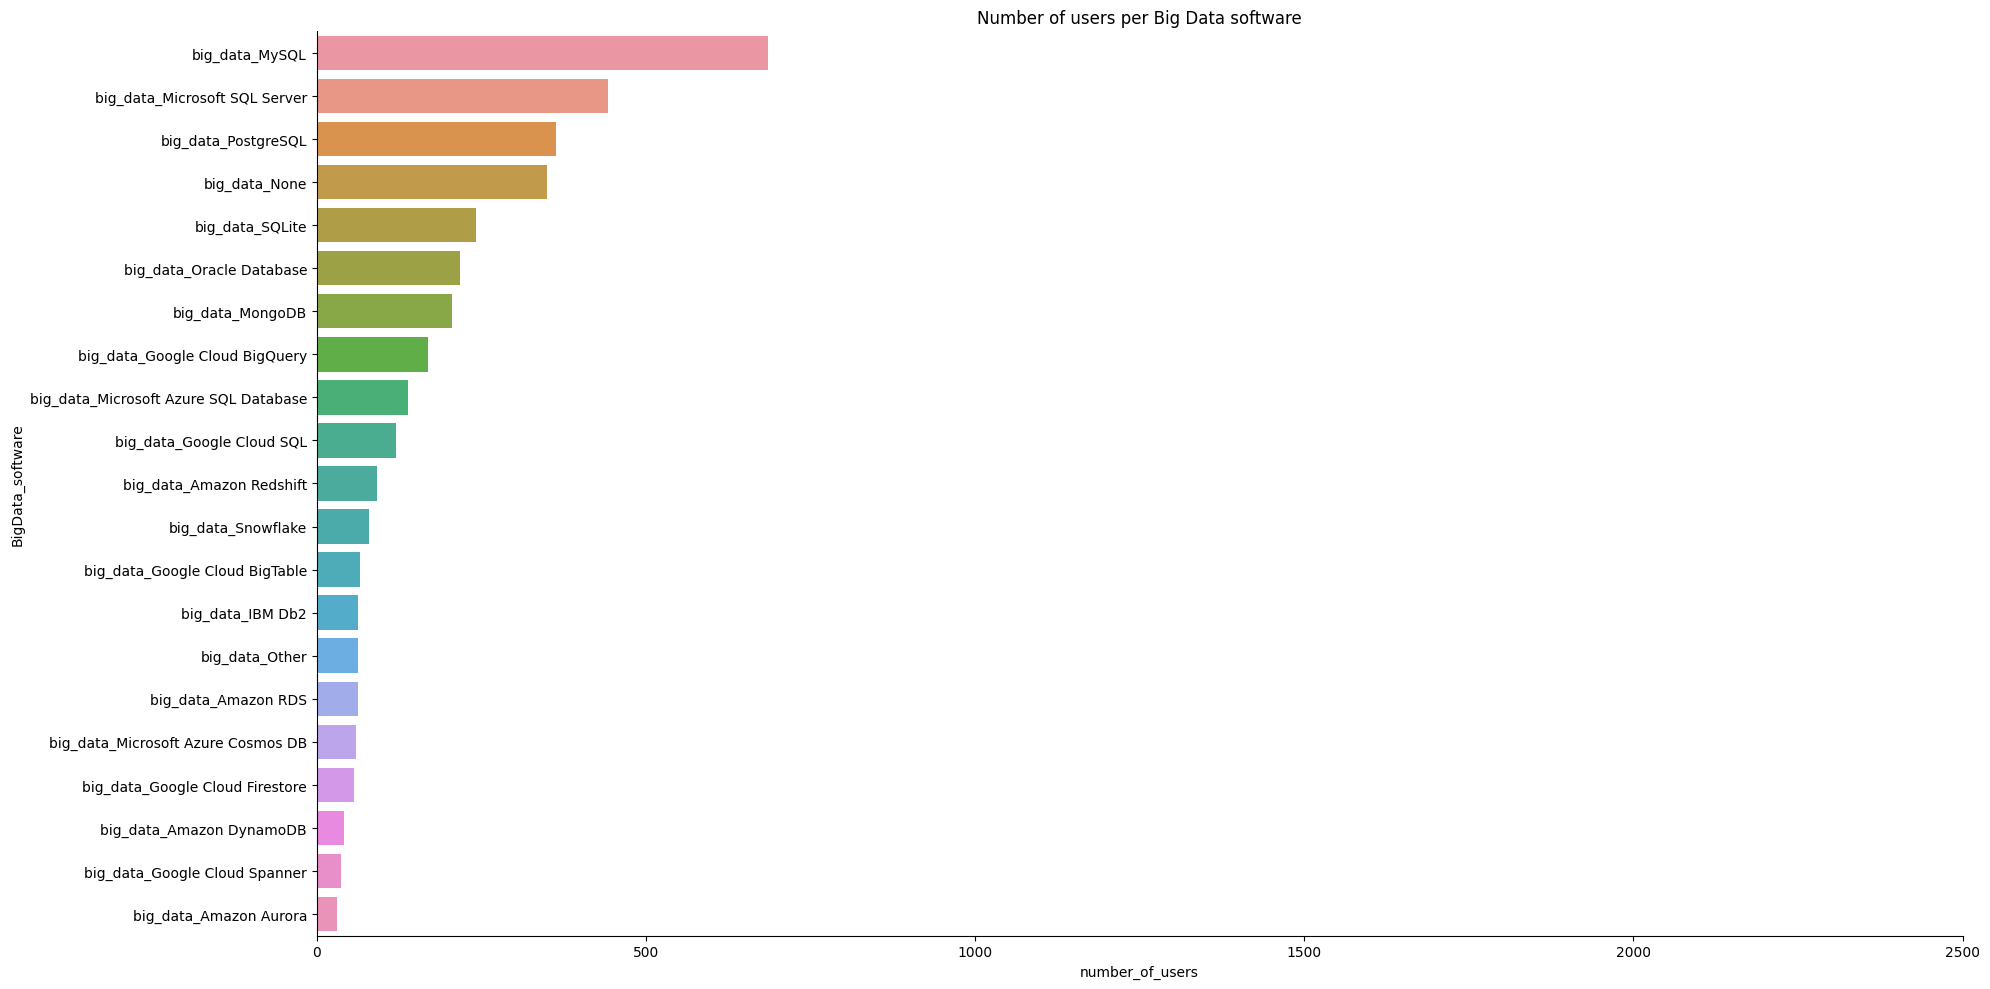

In [31]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='BigData_software', x= 'number_of_users', data=df_big_data, order= df_big_data.sort_values('number_of_users', ascending= False)['BigData_software'])

fig.set_title('Number of users per Big Data software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [32]:
df_bi = df.loc[:, 'BI_tools_SAP Analytics Cloud' : 'BI_tools_Other'].sum().reset_index()
df_bi.columns = ['BI_tools', 'number_of_users']
df_bi

,index,0
0,BI_tools_SAP Analytics Cloud,59.0
1,BI_tools_TIBCO Spotfire,26.0
2,BI_tools_None,395.0
3,BI_tools_Salesforce,87.0
4,BI_tools_Amazon QuickSight,34.0
5,BI_tools_Microsoft Power BI,673.0
6,BI_tools_Qlik,118.0
7,BI_tools_Tableau,749.0
8,BI_tools_Thoughtspot,12.0
9,BI_tools_Google Data Studio,217.0


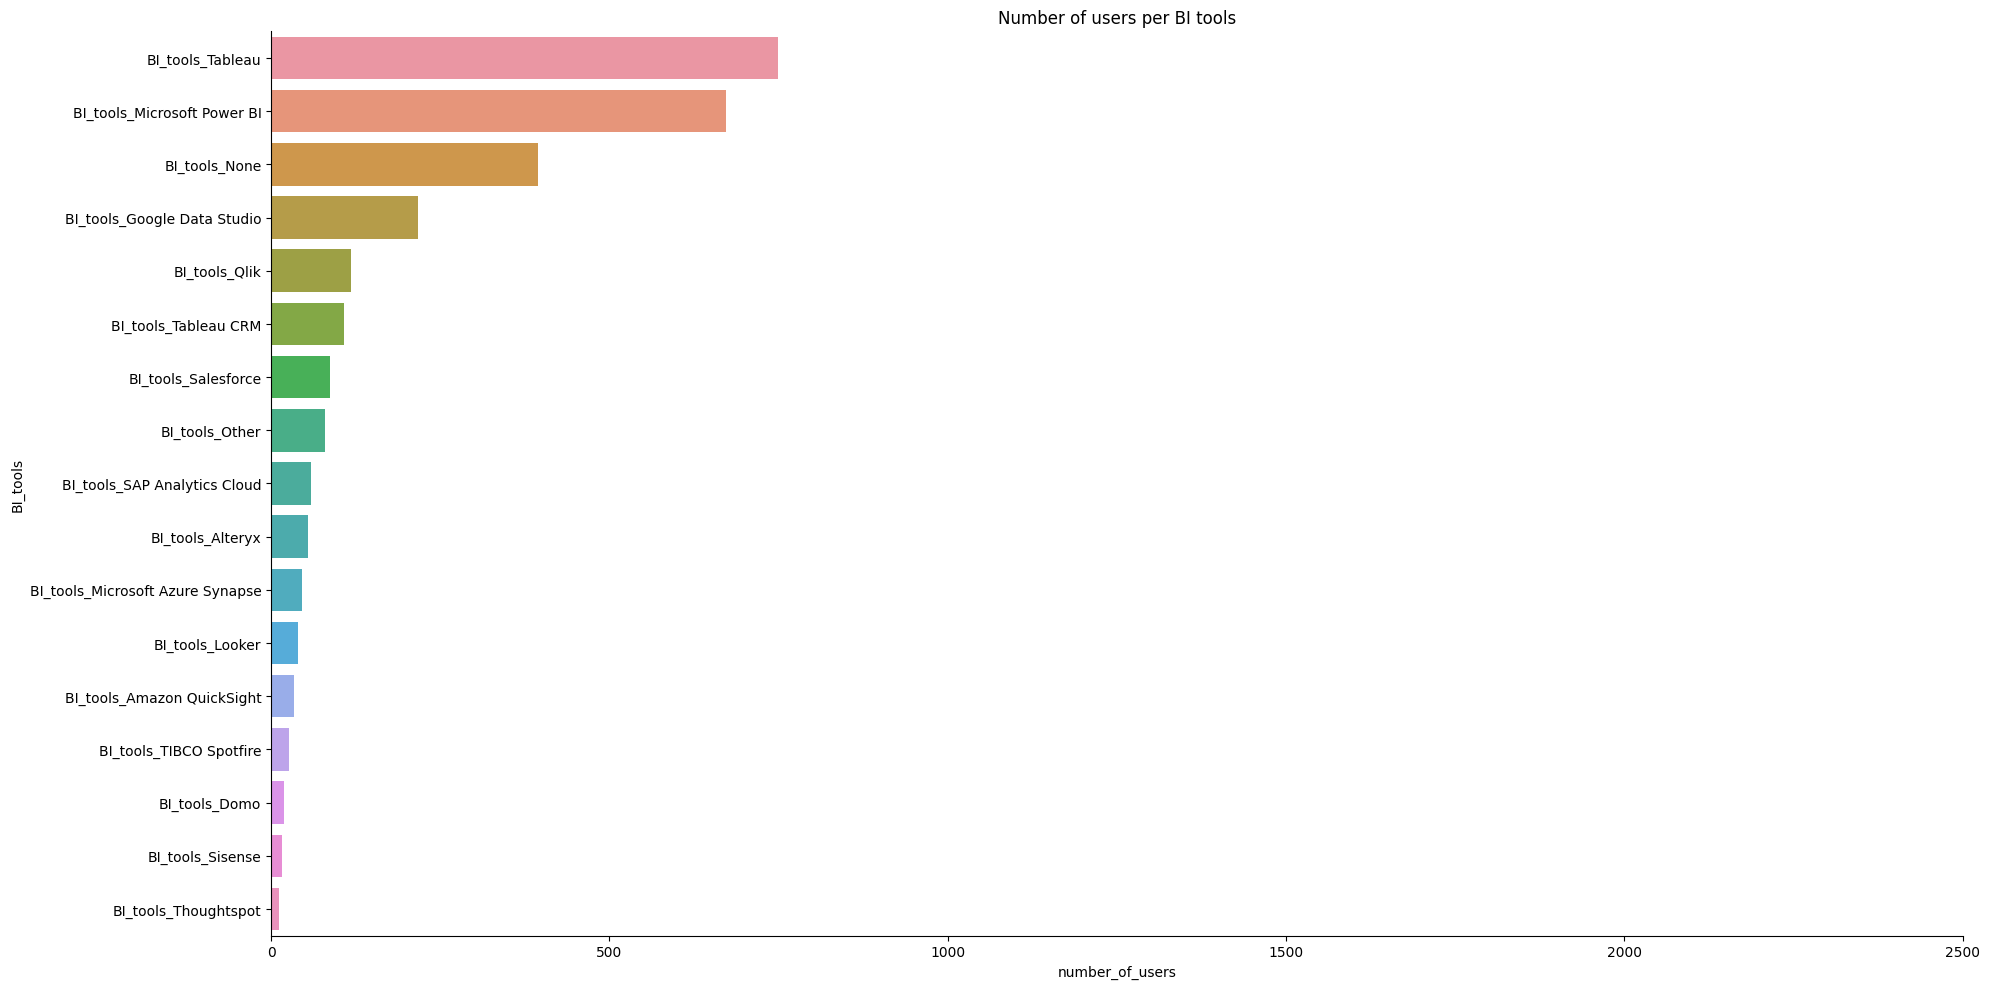

In [34]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='BI_tools', x= 'number_of_users', data=df_bi, order= df_bi.sort_values('number_of_users', ascending= False)['BI_tools'])

fig.set_title('Number of users per BI tools') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

plt.tight_layout()

plt.show()

In [35]:
df_work_acts = df.loc[:, 'work_activities_Analyze and understand data to influence product or business decisions' : 'work_activities_Other'].sum().reset_index()
df_work_acts.columns = ['work_activities', 'number_of_users']
df_work_acts

,index,0
0,work_activities_Analyze and understand data to...,2343.0
1,work_activities_None of these activities are a...,274.0
2,work_activities_Experimentation and iteration ...,398.0
3,work_activities_Build and/or run a machine lea...,446.0
4,work_activities_Build and/or run the data infr...,957.0
5,work_activities_Do research that advances the ...,344.0
6,work_activities_Build prototypes to explore ap...,571.0
7,work_activities_Other,121.0


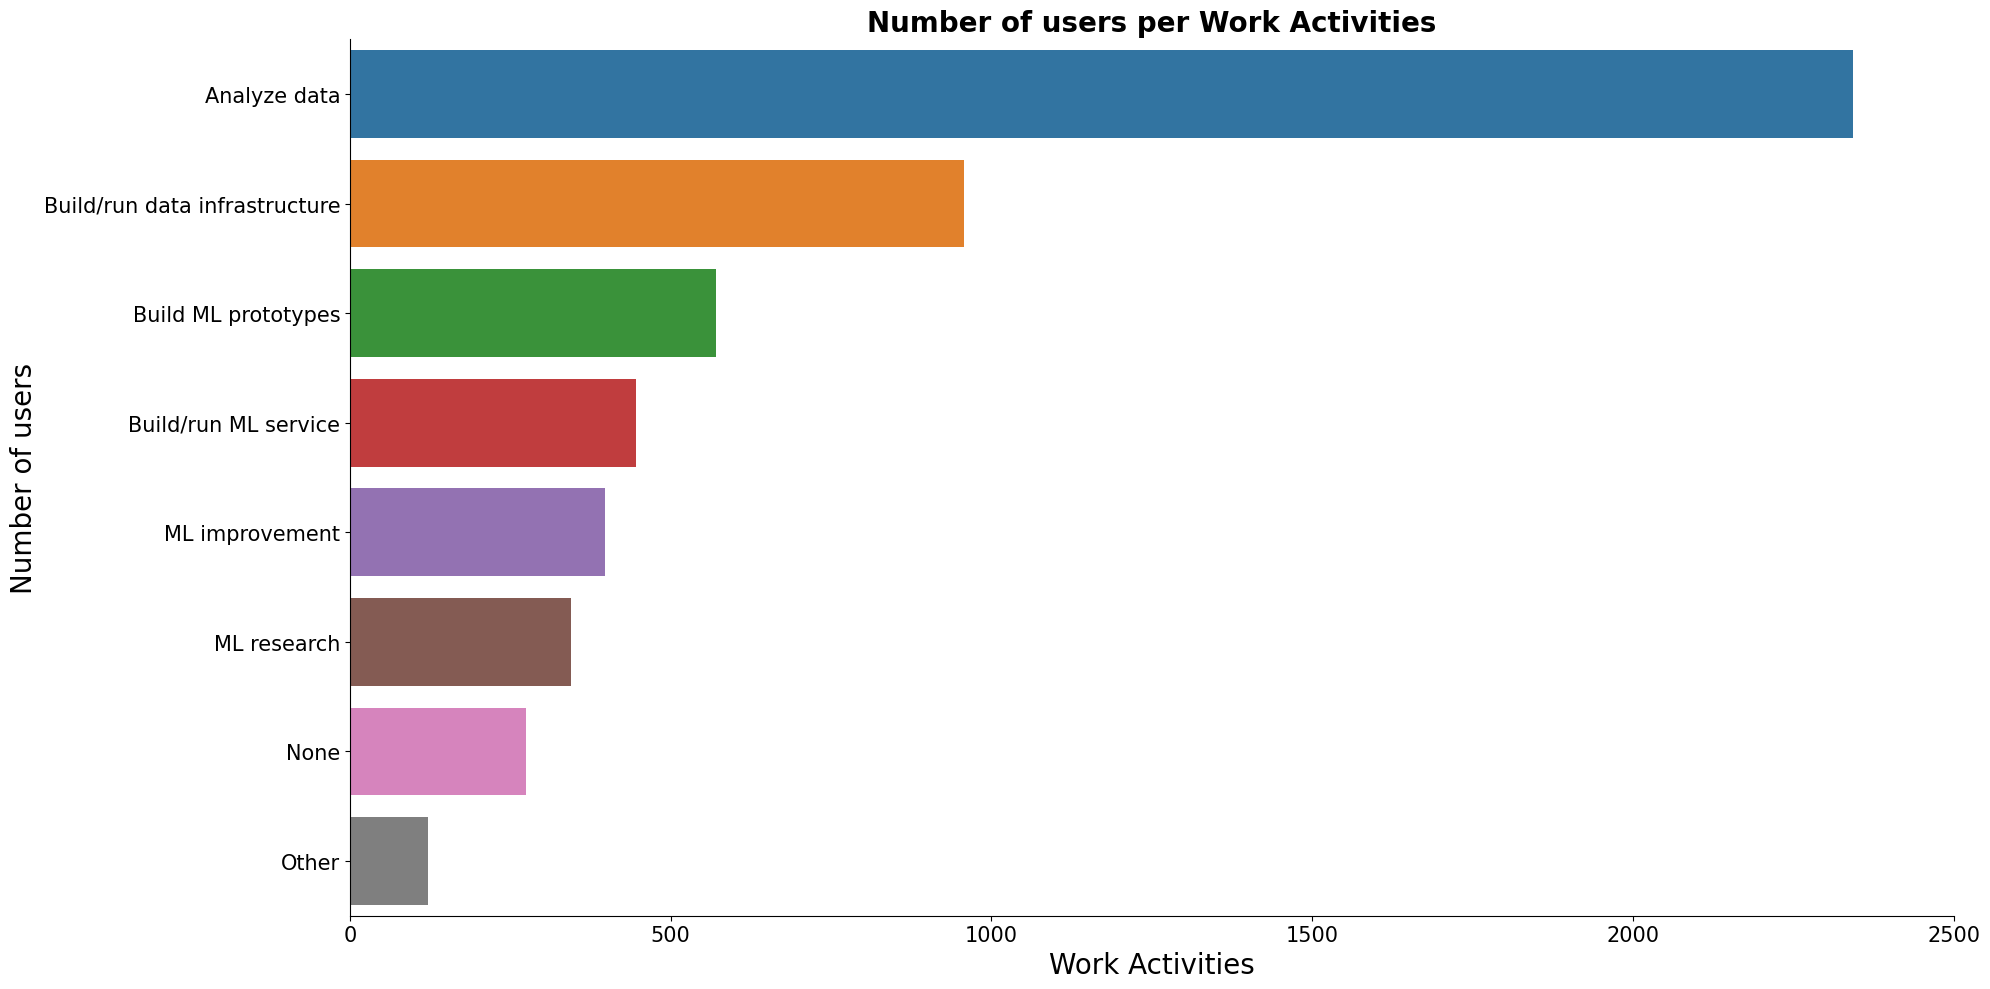

In [50]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='work_activities', x= 'number_of_users', data=df_work_acts, order= df_work_acts.sort_values('number_of_users', ascending= False)['work_activities'])

fig.set_title('Number of users per Work Activities', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Work Activities", fontsize = 20)
fig.set_ylabel (ylabel = "Number of users", fontsize = 20)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], labels = [0, 500, 1000, 1500, 2000, 2500], rotation= 0, fontsize = 15)
fig.set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"], rotation = 0, fontsize = 15)

plt.tight_layout()

plt.show()

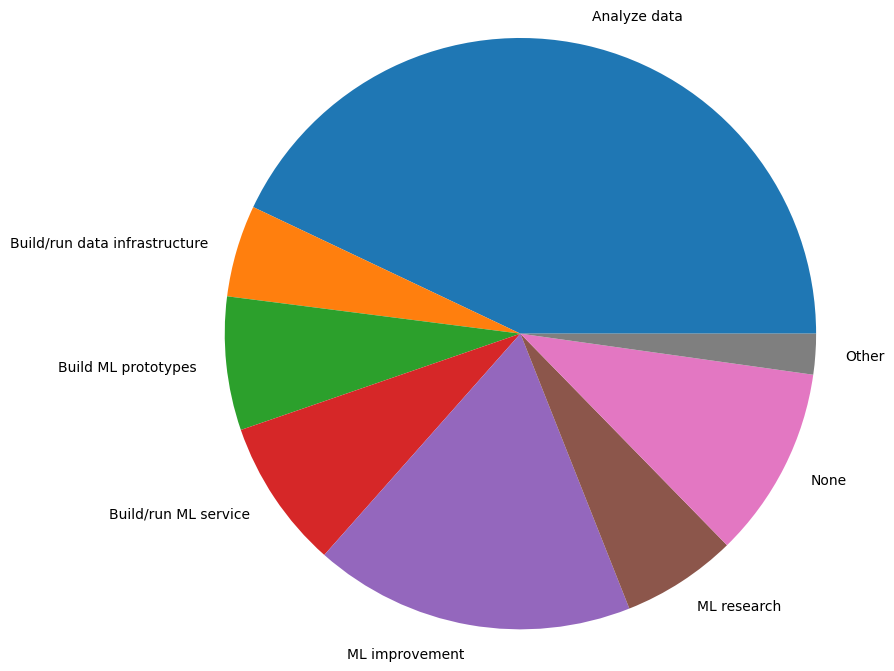

In [60]:
plt.figure()
plt.pie(df_work_acts['number_of_users'], labels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"], radius = 2)
plt.show()

In [94]:
condiciones = [(df['years_programming'] == 'I have never written code'), 
                ((df['years_programming'] == '< 1 years')|(df['years_programming'] == '1-3 years')), 
                ((df['years_programming'] == '3-5 years')| (df['years_programming'] == '5-10 years')|(df['years_programming'] == '10-20 years')|(df['years_programming'] == '20+ years'))]
categorias = ['Sin experiencia', 'Junior', 'Senior'] 

In [95]:
df['programming_experience'] = np.select(condiciones, categorias)

/tmp/ipykernel_3939/3285042291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['programming_experience'] = np.select(condiciones, categorias)


In [96]:
df_group_ex = df.groupby('programming_experience').sum()

/tmp/ipykernel_3939/1972931604.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_ex = df.groupby('programming_experience').sum()


In [97]:
df_group_ex

,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,activities_data_infrastructure,activities_ML_prototypes,activities_ML_research,activities_Other,activities_improve_ML,activities_analyze_data,activities_run_ML,activities_None,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,primary_tool_local_dev_env,primary_tool_adv_stats,primary_tool_basic_stats,primary_tool_BI,primary_tool_cloud_APIs,primary_tool_Other,first_language_rec_Python,first_language_rec_SQL,first_language_rec_R,first_language_rec_MATLAB,first_language_rec_C,first_language_rec_Julia,first_language_rec_Other,first_language_rec_C++,first_language_rec_Javascript,first_language_rec_Java,first_language_rec_None,first_language_rec_Bash,first_language_rec_Swift
programming_experience,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Junior,678.0,584.0,85.0,17.0,166.0,11.0,98.0,45.0,26.0,145.0,184.0,47.0,18.0,11.0,19.0,550.0,74.0,25.0,30.0,12.0,460.0,66.0,369.0,171.0,26.0,341.0,34.0,1581.0,136.0,154.0,40.0,536.0,8.0,206.0,47.0,111.0,253.0,145.0,1075.0,9.0,1355.0,61.0,479.0,98.0,462.0,246.0,137.0,87.0,23.0,272.0,523.0,690.0,372.0,46.0,66.0,283.0,109.0,973.0,459.0,1253.0,466.0,78.0,27.0,130.0,44.0,523.0,251.0,177.0,64.0,177.0,1313.0,215.0,158.0,28.0,201.0,23.0,38.0,32.0,103.0,125.0,187.0,79.0,19.0,24.0,96.0,28.0,110.0,241.0,23.0,412.0,45.0,35.0,14.0,68.0,126.0,49.0,241.0,18.0,29.0,10.0,37.0,10.0,18.0,35.0,5.0,6.0,49.0,67.0,24.0,462.0,403.0,373.0,90.0,680.0,210.0,34.0,34.0,1400.0,226.0,141.0,10.0,43.0,9.0,14.0,27.0,9.0,27.0,7.0,4.0,0.0
Senior,399.0,336.0,67.0,6.0,69.0,11.0,46.0,28.0,19.0,91.0,90.0,41.0,10.0,15.0,12.0,383.0,39.0,28.0,29.0,16.0,285.0,61.0,204.0,104.0,37.0,269.0,22.0,884.0,94.0,173.0,19.0,392.0,13.0,182.0,84.0,189.0,252.0,143.0,791.0,11

In [121]:
for i in df.columns:
    print(f"'{i}', ")

'age', 
'gender', 
'country', 
'continent', 
'job_title', 
'size_DA_dept', 
'years_programming', 
'first_language_rec', 
'primary_data_tool', 
'ML', 
'notebooks_KaggleNotebooks', 
'notebooks_ColabNotebooks', 
'notebooks_AzureNotebooks', 
'notebooks_Paperspace/Gradient', 
'notebooks_Binder/JupyterHub', 
'notebooks_CodeOcean', 
'notebooks_IBMWatsonStudio', 
'notebooks_AmazonSagemakerStudioNotebooks', 
'notebooks_AmazonEMRNotebooks', 
'notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI)', 
'notebooks_GoogleCloudDatalab', 
'notebooks_DatabricksCollaborativeNotebooks', 
'notebooks_Zeppelin/ZeplNotebooks', 
'notebooks_DeepnoteNotebooks', 
'notebooks_ObservableNotebooks', 
'notebooks_None', 
'notebooks_Other', 
'sharing_PlotlyDash', 
'sharing_Streamlit', 
'sharing_NBViewer', 
'sharing_GitHub', 
'sharing_Personalblog', 
'sharing_Kaggle', 
'sharing_Colab', 
'sharing_Shiny', 
'sharing_does_not_share', 
'sharing_Other', 
'dev_language_Python', 
'dev_language_MATLAB', 
'dev_language_Javascript', 


In [122]:
df_tools = df.drop(columns = ['primary_tool_local_dev_env', 
                            'primary_tool_adv_stats', 
                            'primary_tool_basic_stats', 
                            'primary_tool_BI', 
                            'primary_tool_cloud_APIs', 
                            'primary_tool_Other', 
                            'first_language_rec_Python', 
                            'first_language_rec_SQL', 
                            'first_language_rec_R', 
                            'first_language_rec_MATLAB', 
                            'first_language_rec_C', 
                            'first_language_rec_Julia', 
                            'first_language_rec_Other', 
                            'first_language_rec_C++', 
                            'first_language_rec_Javascript', 
                            'first_language_rec_Java', 
                            'first_language_rec_None', 
                            'first_language_rec_Bash', 
                            'first_language_rec_Swift', 
                            'activities_data_infrastructure', 
                            'activities_ML_prototypes', 
                            'activities_ML_research', 
                            'activities_Other', 
                            'activities_improve_ML', 
                            'activities_analyze_data', 
                            'activities_run_ML', 
                            'activities_None',], axis = 1)

In [124]:
df_tools.head(2)

,age,gender,country,continent,job_title,size_DA_dept,years_programming,first_language_rec,primary_data_tool,ML,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,programming_experience
16,50-54,Man,Belgium,Europe,Data Analyst,5-9,20+ years,Python,"Local development environments (RStudio, Jupyt...",1-2 years,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior
32,22-24,Nonbinary,United States of America,America,Data Analyst,3-4,< 1 years,R,NaN,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior


In [152]:
df_sum = df_tools.select_dtypes(include=np.number).sum().reset_index()
df_sum.columns = ['tool', 'number_of_users']
df_sum = df_sum.sort_values(by='number_of_users', ascending=False).tail(73)

In [150]:
lista_top_30 = df_sum['tool'].values.tolist()

In [163]:
lista_other = df_sum['tool'].values.tolist()

In [164]:
lista_other

['big_data_None',
 'dev_language_Javascript',
 'dev_language_Other',
 'dev_language_C++',
 'sharing_Colab',
 'notebooks_GoogleCloudDatalab',
 'IDE_Sublime Text',
 'big_data_SQLite',
 'notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI)',
 'notebooks_Binder/JupyterHub',
 'visualisation_Shiny',
 'dev_language_MATLAB',
 'big_data_Oracle Database',
 'BI_tools_Google Data Studio',
 'big_data_MongoDB',
 'visualisation_Geoplotlib',
 'big_data_Google Cloud BigQuery',
 'IDE_MATLAB',
 'IDE_Other',
 'notebooks_AzureNotebooks',
 'notebooks_IBMWatsonStudio',
 'big_data_Microsoft Azure SQL Database',
 'visualisation_Bokeh',
 'dev_language_Bash',
 'sharing_Personalblog',
 'visualisation_Other',
 'big_data_Google Cloud SQL',
 'BI_tools_Qlik',
 'notebooks_Other',
 'BI_tools_Tableau CRM',
 'visualisation_D3 js',
 'visualisation_Leaflet / Folium',
 'big_data_Amazon Redshift',
 'IDE_None',
 'notebooks_DatabricksCollaborativeNotebooks',
 'BI_tools_Salesforce',
 'IDE_Vim / Emacs',
 'BI_tools_Other',
 'big_d

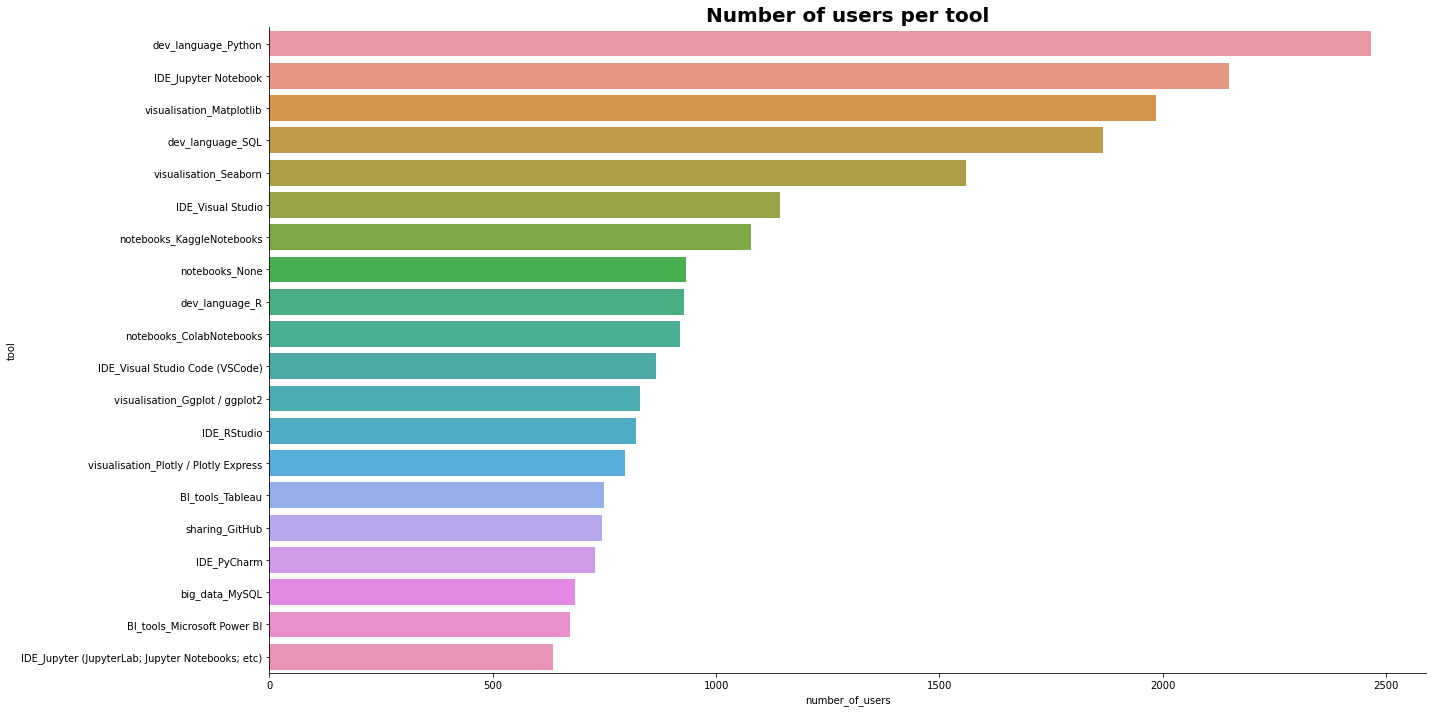

In [131]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y = 'tool', x = 'number_of_users', data=df_sum, order= df_sum.sort_values('number_of_users', ascending= False)['tool'])

fig.set_title('Number of users per tool', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

plt.tight_layout()

plt.show()

In [160]:
df_group_tools = df_tools.groupby('programming_experience').sum()
df_group_tools = df_group_tools.drop(columns=lista_other, axis=1)
df_group_tools

/tmp/ipykernel_3939/3112881586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_tools = df_tools.groupby('programming_experience').sum()


,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_None,sharing_GitHub,sharing_Kaggle,sharing_does_not_share,dev_language_Python,dev_language_R,dev_language_C,dev_language_Java,dev_language_SQL,IDE_Jupyter Notebook,IDE_PyCharm,IDE_RStudio,IDE_Notepad++,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_None,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,big_data_Microsoft SQL Server,big_data_PostgreSQL,big_data_MySQL,BI_tools_None,BI_tools_Tableau,BI_tools_Microsoft Power BI
programming_experience,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Junior,678.0,584.0,550.0,460.0,369.0,341.0,1581.0,536.0,206.0,253.0,1075.0,1355.0,479.0,462.0,246.0,272.0,523.0,690.0,372.0,283.0,973.0,459.0,1253.0,466.0,201.0,187.0,412.0,241.0,462.0,403.0
Senior,399.0,336.0,383.0,285.0,204.0,269.0,884.0,392.0,182.0,252.0,791.0,794.0,249.0,358.0,293.0,204.0,342.0,454.0,262.0,137.0,586.0,337.0,731.0,364.0,241.0,177.0,273.0,154.0,287.0,270.0
Sin experiencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
